<a href="https://colab.research.google.com/github/savindu29/NeuralNet/blob/dev/data_preprocess_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from scipy.signal import butter, lfilter
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
#load dataset
dataset_url = "https://media.githubusercontent.com/media/savindu29/NeuralNet/main/dataset/BCICIV_2a_all_patients.csv?token=AUUOO4TBR7SE4JC3A24DTFLG2ZL2M"
dataset_1 = pd.read_csv(dataset_url)
dataset_1.head()

,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,1,-0.100,tongue,8,-1.681412,2.245496,-0.158350,1.163765,-1.523659,-0.575267,...,0.758116,3.441785,0.305517,1.137473,-1.275763,-2.898359,0.656704,-2.010063,-1.613804,-1.942455
1,1,-0.096,tongue,8,0.420417,0.587559,1.650510,0.970672,1.505904,0.891796,...,1.541586,-0.071620,0.258909,-1.448198,0.142472,-1.968405,-1.733655,-2.935578,-3.125256,-4.674610
2,1,-0.092,tongue,8,0.551365,1.499758,0.121302,2.859433,2.613414,4.636026,...,2.649097,-2.137938,-1.612096,-1.610218,-0.410173,-0.274957,-4.776535,-5.099551,-2.798995,-5.862021
3,1,-0.088,tongue,8,3.054916,-1.807238,1.843603,2.286812,5.995872,6.651295,...,6.031554,-5.249621,-2.672998,-3.452370,0.189081,1.593829,-6.081577,-5.476860,-2.932163,-6.874095
4,1,-0.084,tongue,8,2.506710,-2.453101,0.221178,0.127278,4.519931,6.249573,...,7.827097,-5.309546,-2.488783,-3.707608,1.447515,4.268278,-4.383690,-4.218426,-1.331932,-5.322692


# **Filtering the Data**

Need to create a bandpass filter that will allow frequencies between 8 and 30 Hz (which are relevant for motor imagery tasks) to pass through, while filtering out other frequencies.


In [5]:
# define the bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# **Apply the Filter to EEG Data**



In [6]:
# Sampling frequency (Hz), adjust according to your data
fs = 250.0

# Desired cutoff frequencies of the bandpass filter (Hz)
lowcut = 8.0
highcut = 30.0

# Apply the filter to each EEG channel
for column in dataset_1.columns[4:]:  # Assuming EEG data starts from the 5th column onward
    dataset_1[column] = butter_bandpass_filter(dataset_1[column], lowcut, highcut, fs, order=5)

# Inspect the filtered data
dataset_1.head()


,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,1,-0.100,tongue,8,-0.001246,0.001663,-0.000117,0.000862,-0.001129,-0.000426,...,0.000562,0.002550,0.000226,0.000843,-0.000945,-0.002147,0.000486,-0.001489,-0.001195,-0.001439
1,1,-0.096,tongue,8,-0.009137,0.013053,0.000333,0.007258,-0.007446,-0.002572,...,0.005402,0.019287,0.001909,0.005319,-0.007063,-0.017745,0.002406,-0.013470,-0.011383,-0.014378
2,1,-0.092,tongue,8,-0.029766,0.047865,0.006300,0.030093,-0.019086,-0.002687,...,0.025295,0.064616,0.006173,0.012681,-0.024191,-0.067351,-0.000572,-0.059170,-0.050864,-0.068198
3,1,-0.088,tongue,8,-0.053036,0.107312,0.027720,0.082595,-0.012023,0.025472,...,0.079183,0.118901,0.006061,0.005380,-0.049889,-0.153141,-0.038908,-0.169056,-0.142234,-0.205352
4,1,-0.084,tongue,8,-0.039247,0.154583,0.070121,0.165916,0.069653,0.137726,...,0.190537,0.097533,-0.022265,-0.052718,-0.065095,-0.218604,-0.165028,-0.351043,-0.277426,-0.439839


In [7]:
# Save the filtered data to a new CSV file
dataset_1.to_csv('filtered_eeg_data.csv', index=False)


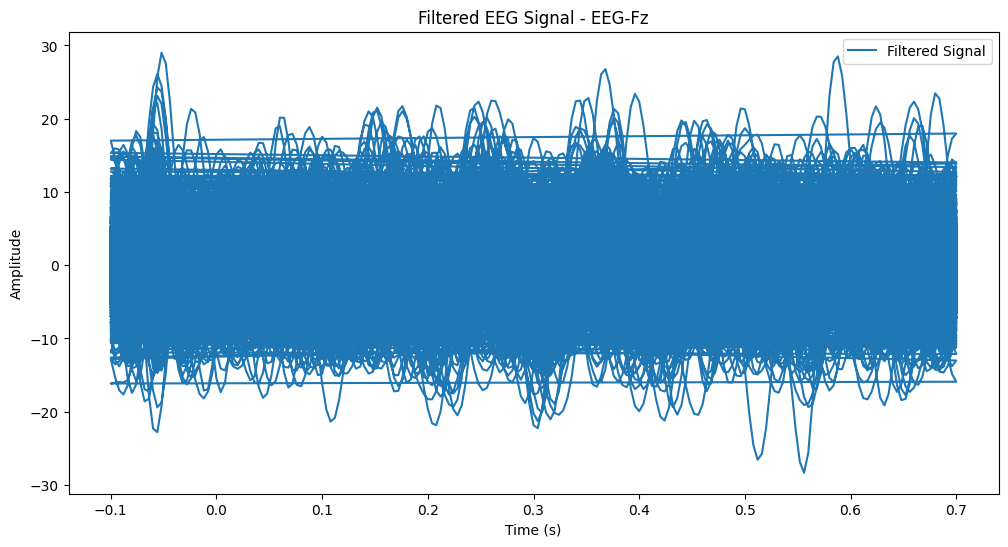

In [10]:
# Plot the original and filtered signals for a specific EEG channel
channel = 'EEG-Fz'  # Example EEG channel

plt.figure(figsize=(12, 6))
plt.plot(dataset_1['time'], dataset_1[channel], label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Filtered EEG Signal - {channel}')
plt.legend()
plt.show()